In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
transform = transforms.Compose([
    transforms.Resize(size=(224, 224)), # Resize to 224*224 for vgg16
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:02<00:00, 80.4MB/s]


In [ ]:
num_epochs = 5
batch_size = 40
learning_rate = 0.001
n_total_step = len(trainloader)
print(n_total_step)

782


In [ ]:
model = models.vgg16(pretrained = True)
input_lastLayer = model.classifier[6].in_features
model.classifier[6] = nn.Linear(input_lastLayer,10)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9,weight_decay=5e-4)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 136MB/s]


In [ ]:
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(trainloader):
        imgs = imgs.to(device)
        labels = labels.to(device)
        labels_hat = model(imgs)
        n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()
        loss_value = criterion(labels_hat, labels)
        loss_value.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 250 == 0:
          print(f'epoch {epoch+1}/{num_epochs}, step: {i+1}/{n_total_step}: loss {loss_value:.5f}, acc = {100*(n_corrects/labels.size(0)):.2f}%')
    print()

epoch 1/5, step: 250/782: loss 0.22696, acc = 93.75%
epoch 1/5, step: 500/782: loss 0.15650, acc = 96.88%
epoch 1/5, step: 750/782: loss 0.44890, acc = 85.94%

epoch 2/5, step: 250/782: loss 0.19498, acc = 90.62%
epoch 2/5, step: 500/782: loss 0.09260, acc = 96.88%
epoch 2/5, step: 750/782: loss 0.19687, acc = 95.31%

epoch 3/5, step: 250/782: loss 0.13848, acc = 96.88%
epoch 3/5, step: 500/782: loss 0.10919, acc = 96.88%
epoch 3/5, step: 750/782: loss 0.03973, acc = 100.00%

epoch 4/5, step: 250/782: loss 0.21401, acc = 95.31%
epoch 4/5, step: 500/782: loss 0.02176, acc = 98.44%
epoch 4/5, step: 750/782: loss 0.03738, acc = 98.44%

epoch 5/5, step: 250/782: loss 0.02754, acc = 98.44%
epoch 5/5, step: 500/782: loss 0.03194, acc = 98.44%
epoch 5/5, step: 750/782: loss 0.01513, acc = 100.00%



In [ ]:
with torch.no_grad():
    number_corrects = 0
    number_samples = 0
    for i, (test_images_set , test_labels_set) in enumerate(testloader):
        test_images_set = test_images_set.to(device)
        test_labels_set = test_labels_set.to(device)

        y_predicted = model(test_images_set)
        labels_predicted = y_predicted.argmax(axis = 1)
        number_corrects += (labels_predicted==test_labels_set).sum().item()
        number_samples += test_labels_set.size(0)
    print(f'Overall accuracy {(number_corrects / number_samples)*100}%')

Overall accuracy 92.13%


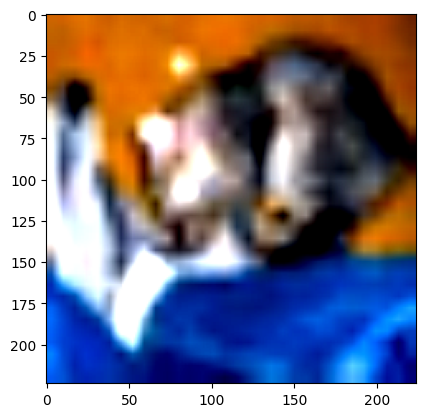

Predicted: cat, Actual: cat


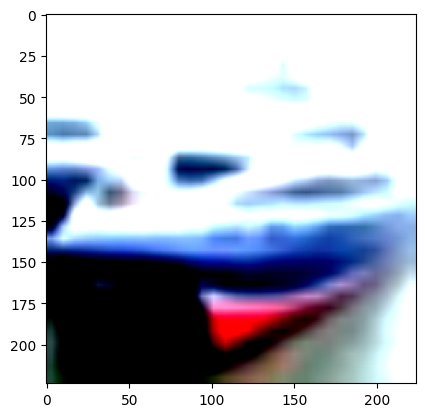

Predicted: ship, Actual: ship


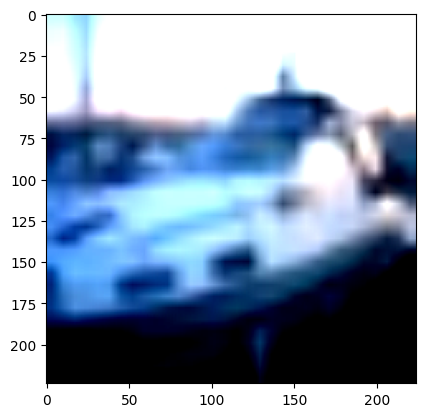

Predicted: ship, Actual: ship


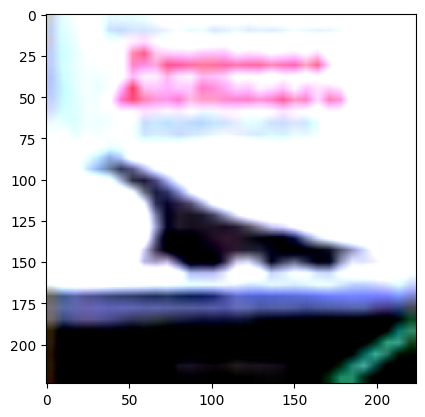

Predicted: bird, Actual: plane


In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(torch.permute(img, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images.to(device))
if isinstance(outputs, tuple):
    outputs = outputs[0]
_, predicted = torch.max(outputs, 1)

for i in range(4):
    imshow(images[i])
    print(f"Predicted: {classes[predicted[i]]}, Actual: {classes[labels[i]]}")